In [1]:
import numpy as np
import os
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import statsmodels.api as sm
from scipy.stats import pearsonr
from scipy.stats import linregress
from scipy.optimize import curve_fit
from pymer4.models import Lmer
import math
import re
import seaborn as sns

In [2]:
data1 = pd.read_csv('C:/Users/111/Desktop/LMX_data_Q10/Simulated_R2_forest_all_tol5_days15_calibration.csv')
m,n = data1.shape
R2_new_all = []
R2_old_all = []

R2_new1 = []
R2_old1 = []
for i in range(m):
    R2_new1.append(data1['R2_New'][i])
    R2_old1.append(data1['R2_Old'][i])
    R2_new_all.append(data1['R2_New'][i])
    R2_old_all.append(data1['R2_Old'][i])
    
data2 = pd.read_csv('C:/Users/111/Desktop/LMX_data_Q10/Simulated_R2_non_forest_all_tol5_days15_calibration.csv')
m,n = data2.shape
R2_new2 = []
R2_old2 = []
for i in range(m):
    R2_new2.append(data2['R2_New'][i])
    R2_old2.append(data2['R2_Old'][i])
    R2_new_all.append(data2['R2_New'][i])
    R2_old_all.append(data2['R2_Old'][i])

In [3]:
a = np.array(R2_new_all)
negative_elements1 = a < 0.6
negative_elements2 = a>=0.8
count1 = np.sum(negative_elements1)
count2 = np.sum(negative_elements2)
#print(count1)
#print(len(a))
print(count1/len(a)*100)
print(count2/len(a)*100)

5.970149253731343
63.43283582089553


In [3]:
data = pd.read_csv('./Old_result/A_result_3/Cor_T_VPD_15days_window.csv')
m,n = data.shape
cor_T_VPD_1 = []
for i in range(m):
    if np.isnan(data['Fixed_AVP'][i]) != 1:
        cor_T_VPD_1.append(data['Fixed_AVP'][i])
cor_T_VPD_2 = []
for i in range(m):
    if np.isnan(data['Non_fixed_AVP'][i]) != 1:
        cor_T_VPD_2.append(data['Non_fixed_AVP'][i])


In [4]:
data = pd.read_csv('./Old_result/A_result_3/Std_of_VPD_AVP.csv')
m,n = data.shape
std_VPD = []
for i in range(m):
    if np.isnan(data['std_VPD'][i]) != 1:
        std_VPD.append(data['std_VPD'][i])
std_AVP = []
for i in range(m):
    if np.isnan(data['std_AVP'][i]) != 1:
        std_AVP.append(data['std_AVP'][i])

In [115]:
type_data = pd.read_csv('C:/Users/111/Desktop/Fluxnet_sites.csv', encoding='latin-1')
site_IGBP = type_data['IGBP'].values
site_ID =  type_data['SITE_ID'].values

count1 = np.zeros((25, 30))
count2 = np.zeros((25, 30))
count_n = np.zeros((25, 30))


path1 = 'C:/Users/111/Desktop/Sim_data/Good_fit_T_VPD_2/'
path2 = 'C:/Users/111/Desktop/Sim_data/Bad_fit_T_VPD_2/'

n = 0
for csv_file in os.listdir(path1):
    if csv_file in os.listdir(path2): # and site_IGBP[site_ID==csv_file[0:-4]] in ['DBF', 'EBF', 'DNF', 'ENF', 'MF']:#['GRA', 'WSA', 'SAV', 'CRO', 'OSH', 'CSH']:
        data1 = pd.read_csv(path1+csv_file)
        data2 = pd.read_csv(path2+csv_file)
        T_data1 = data1['T_data']
        VPD_data1 = data1['VPD_data']
        T_data2 = data2['T_data']
        VPD_data2 = data2['VPD_data']
    
        m1 = len(T_data1)
        m2 = len(T_data2)
        if m1+m2 > 1200:
            for i in range(25):
                for j in range(30):
                    T_data1_ij = T_data1[(T_data1>4+i) & (T_data1<=7+i) & (VPD_data1>j-1) & (VPD_data1<=2+j)]
                    T_data2_ij = T_data2[(T_data2>4+i) & (T_data2<=7+i) & (VPD_data2>j-1) & (VPD_data2<=2+j)]
                    T_len1 = len(T_data1_ij)
                    T_len2 = len(T_data2_ij)
                    if T_len1+T_len2 > 15:  #画图 （50_1, 30_2, 20_3）
                        count1[i][j] += T_len1/(T_len1+T_len2)
                        count2[i][j] += T_len2/(T_len1+T_len2)
                        count_n[i][j] += 1



In [118]:
percent1 = np.zeros((25, 30))
percent2 = np.zeros((25, 30))
for i in range(25):
    for j in range(30):
        if count_n[i][j] != 0 and count_n[i][j] > 40:  #画图 （50）
            percent1[i][j] = count1[i][j]/count_n[i][j]
            percent2[i][j] = count2[i][j]/count_n[i][j]

T_plot1 = []
VPD_plot1 = []
per_plot1 = []
for i in range(25):
    for j in range(30):
        if np.isnan(percent1[i][j]) !=1 and percent1[i][j]!=0:
            T_plot1.append(5.5+i)
            VPD_plot1.append(0.5+j)
            per_plot1.append(percent1[i][j])
            
T_plot2 = []
VPD_plot2 = []
per_plot2 = []
for i in range(25):
    for j in range(30):
        if np.isnan(percent2[i][j]) !=1 and percent2[i][j]!=0:
            T_plot2.append(5.5+i)
            VPD_plot2.append(0.5+j)
            per_plot2.append(percent2[i][j])
            
percent3 = percent1 - percent2
T_plot3 = []
VPD_plot3 = []
per_plot3 = []
for i in range(25):
    for j in range(30):
        if np.isnan(percent3[i][j]) !=1 and percent3[i][j]!=0:
            T_plot3.append(5.5+i)
            VPD_plot3.append(0.5+j)
            per_plot3.append(percent3[i][j])

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


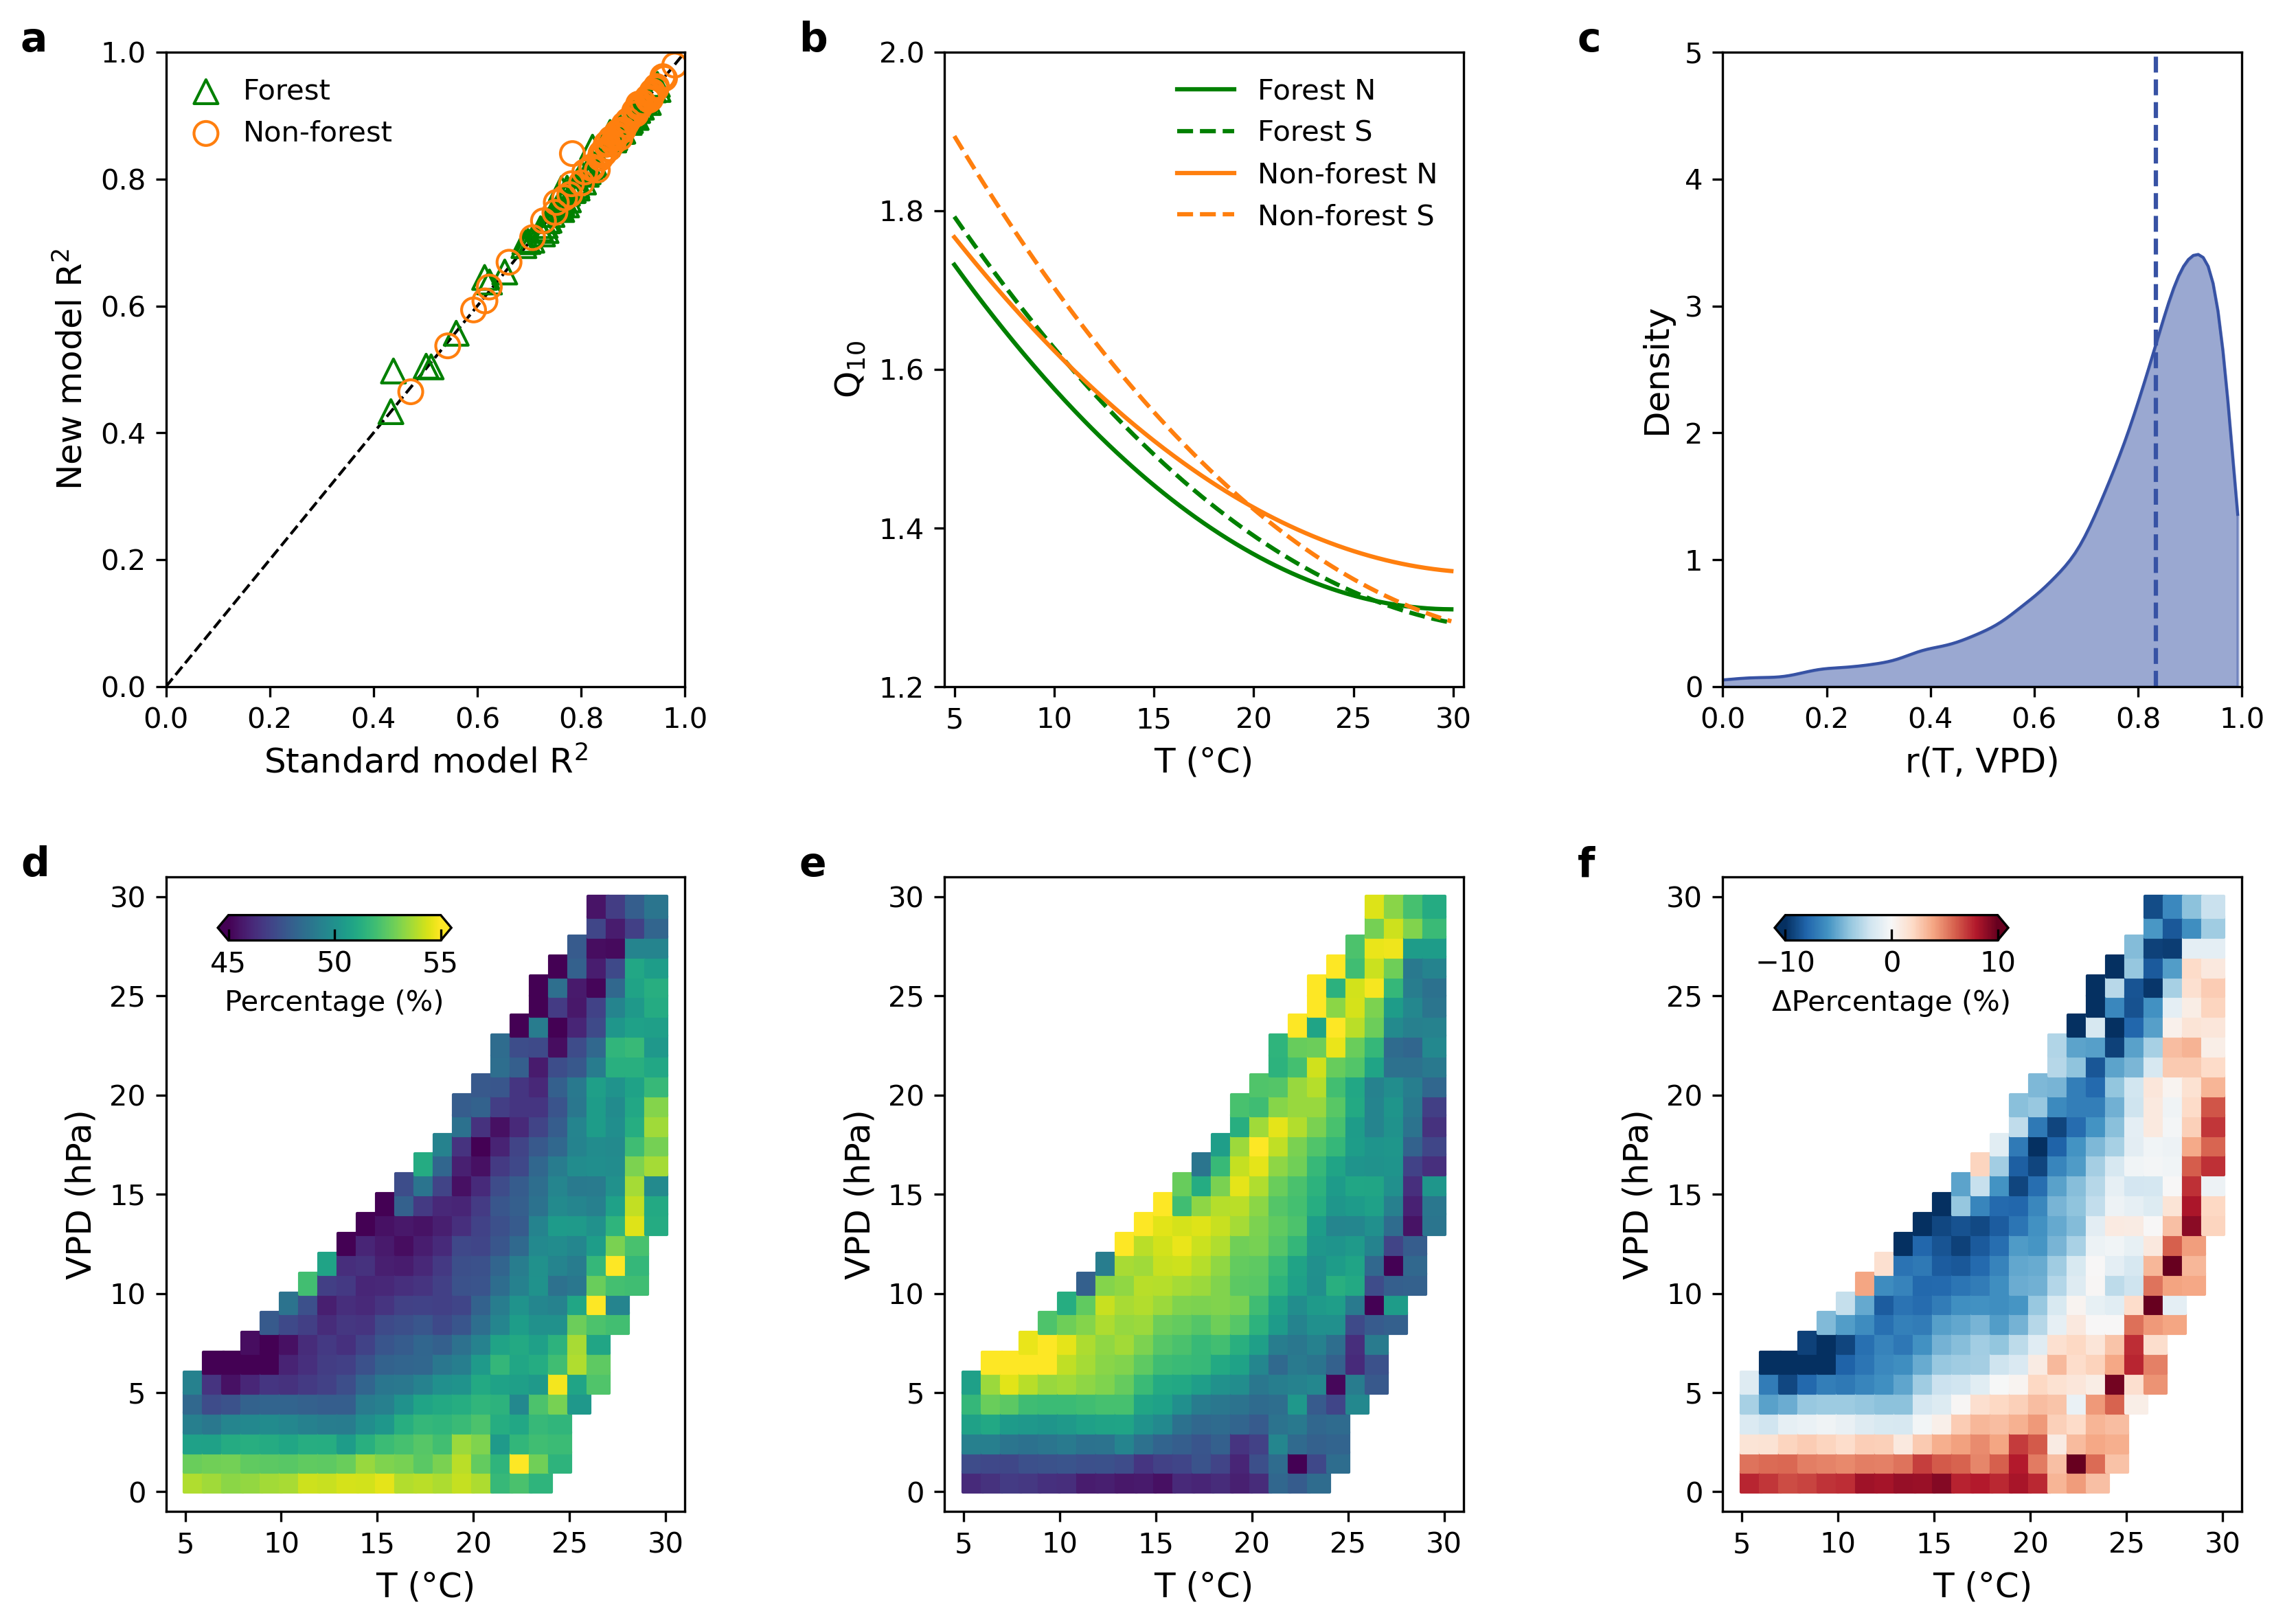

In [119]:
fig = plt.figure(figsize=(13, 4*2.3),dpi=300)
plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=0.5, hspace=0.3)
plt.rcParams['axes.linewidth'] = 0.8

################################################################################################################################
ax1 = fig.add_subplot(2,3,1)

color1 = (55/255, 82/255, 164/255)
color2 = (235/255, 29/255, 34/255)

ax1.scatter(R2_old1, R2_new1,s=70, marker='^', edgecolor='green', facecolor='none', label='Forest')
ax1.scatter(R2_old2, R2_new2,s=70, marker='o', edgecolor='tab:orange', facecolor='none', label='Non-forest')
ax1.plot([0,1], [0,1], color='black', linewidth=1, ls='--', zorder=0)
ax1.set_xlim(0,1)
ax1.set_ylim(0,1)
ax1.set_xlabel('Standard model R$^{2}$',size = 12)
ax1.set_ylabel('New model R$^{2}$',size = 12)
ax1.text(-0.28, 1.05, "a", transform=ax1.transAxes,
         fontsize=14, fontweight='bold', va='top', ha='left')
ax1.legend(fontsize=10, edgecolor='white', loc='upper left', frameon=True, handlelength = 1)


################################################################################################################################
ax2 = fig.add_subplot(2,3,2)

x = np.arange(5,30,0.1)
#forest fixed AVP
y1 = 6.95285721e-04*x**2 -4.17148517e-02*x + 1.92320229e+00
#forest T
y2 = 6.32853339e-04*x**2 -4.26438024e-02*x + 1.99001564e+00

#non forest fixed AVP
y3 = 5.88121506e-04*x**2 -3.74317241e-02*x + 1.93918048e+00
#non forest T
y4 = 6.86671640e-04*x**2 -4.85353017e-02*x + 2.11970422e+00

ax2.plot(x, y1, color='green', ls='-', linewidth = 1.5, label='Forest N')
ax2.plot(x, y2, color='green', ls='--', linewidth = 1.5, label='Forest S')
ax2.plot(x, y3, color='tab:orange', ls='-', linewidth = 1.5, label='Non-forest N')
ax2.plot(x, y4, color='tab:orange', ls='--', linewidth = 1.5, label='Non-forest S')

ax2.set_xlabel('T (°C)',size = 12)
ax2.set_ylabel('Q$_{10}$',size = 12)
ax2.set_xlim(4.5,30.5)
ax2.set_ylim(1.2,2)
ax2.set_xticks(np.linspace(5,30,6))
ax2.set_yticks(np.linspace(1.2,2,5))
ax2.text(-0.28, 1.05, "b", transform=ax2.transAxes,
         fontsize=14, fontweight='bold', va='top', ha='left')
ax2.legend(fontsize=10, edgecolor='white', loc='upper right', frameon=True, handlelength =2)



################################################################################################################################
ax3 = fig.add_subplot(2,3,3)
kde_data = sns.kdeplot(cor_T_VPD_2, color=color1, cut=0,linewidth=1).get_lines()[0].get_data()
x_kde = kde_data[0]
y_kde = kde_data[1]
# 填充颜色
ax3.fill_between(x_kde, y_kde, color=color1, alpha=0.5)
ax3.set_xlabel('r(T, VPD)',size = 12)
ax3.set_ylabel('Density',size = 12)
ax3.set_xlim(-0.0,1.0)
ax3.set_ylim(0,5)
ax3.set_xticks(np.linspace(0,1,6))
ax3.set_yticks(np.linspace(0,5,6))
ax3.axvline(x=np.median(cor_T_VPD_2),ls="--",linewidth=1.5,c=color1, zorder=2)
ax3.text(-0.28, 1.05, "c", transform=ax3.transAxes,
         fontsize=14, fontweight='bold', va='top', ha='left')

################################################################################################################################
ax1 = fig.add_subplot(2,3,4)

ax1.scatter(T_plot1, VPD_plot1, c=per_plot1, s=55, marker='s', cmap='viridis', vmin=0.45, vmax=0.55)

ax1.set_xlim(4,31)
ax1.set_ylim(-1,31)
ax1.set_xlabel('T (°C)',size = 12)
ax1.set_ylabel('VPD (hPa)',size = 12)
ax1.text(-0.28, 1.05, "d", transform=ax1.transAxes,
         fontsize=14, fontweight='bold', va='top', ha='left')
ax1.legend(fontsize=10, edgecolor='white', loc='upper left', frameon=True, handlelength = 1)

ax_pos = ax1.get_position()
x1 = ax_pos.x0
y1 = ax_pos.y0
width1 = ax_pos.width
height1 = ax_pos.height
cax = fig.add_axes([x1+0.1*width1, y1+0.9*height1, 0.45*width1, 0.04*height1])  #四个参数分别是colorbar的左、下、宽、长 
cbar = mpl.colorbar.ColorbarBase(cax, cmap='viridis',#颜色
                                  norm=mpl.colors.Normalize(45,55),#设置颜色条最大最小值
                                  ticks=list(np.linspace(45, 55, 3)),#自定义各段的记号
                                  orientation='horizontal', #方向垂直
                                  label = 'Percentage (%)',
                                  extend = 'both');
cbar.ax.xaxis.set_label_position('bottom') # 移动colorbar的标签到顶部
cbar.ax.tick_params(direction='in', bottom = True, top = False, labelbottom = True, labeltop = False, length=4, colors='k') # 设置标签样式
cbar.ax.tick_params(labelsize=10)
#cbar.set_ticks([])

################################################################################################################################
ax1 = fig.add_subplot(2,3,5)


ax1.scatter(T_plot2, VPD_plot2, c=per_plot2, s=55, marker='s', cmap='viridis', vmin=0.45, vmax=0.55)

ax1.set_xlim(4,31)
ax1.set_ylim(-1,31)
ax1.set_xlabel('T (°C)',size = 12)
ax1.set_ylabel('VPD (hPa)',size = 12)
ax1.text(-0.28, 1.05, "e", transform=ax1.transAxes,
         fontsize=14, fontweight='bold', va='top', ha='left')
ax1.legend(fontsize=10, edgecolor='white', loc='upper left', frameon=True, handlelength = 1)

################################################################################################################################
ax1 = fig.add_subplot(2,3,6)

ax1.scatter(T_plot3, VPD_plot3, c=per_plot3, s=55, marker='s', cmap='RdBu_r', vmin=-0.1, vmax=0.1)

ax1.set_xlim(4,31)
ax1.set_ylim(-1,31)
ax1.set_xlabel('T (°C)',size = 12)
ax1.set_ylabel('VPD (hPa)',size = 12)
ax1.text(-0.28, 1.05, "f", transform=ax1.transAxes,
         fontsize=14, fontweight='bold', va='top', ha='left')
ax1.legend(fontsize=10, edgecolor='white', loc='upper left', frameon=True, handlelength = 1)

ax_pos = ax1.get_position()
x1 = ax_pos.x0
y1 = ax_pos.y0
width1 = ax_pos.width
height1 = ax_pos.height
cax = fig.add_axes([x1+0.1*width1, y1+0.9*height1, 0.45*width1, 0.04*height1])  #四个参数分别是colorbar的左、下、宽、长 
cbar = mpl.colorbar.ColorbarBase(cax, cmap='RdBu_r',#颜色
                                  norm=mpl.colors.Normalize(-10,10),#设置颜色条最大最小值
                                  ticks=list(np.linspace(-10, 10, 3)),#自定义各段的记号
                                  orientation='horizontal', #方向垂直
                                  label = 'ΔPercentage (%)',
                                  extend = 'both');
cbar.ax.xaxis.set_label_position('bottom') # 移动colorbar的标签到顶部
cbar.ax.tick_params(direction='in', bottom = True, top = False, labelbottom = True, labeltop = False, length=4, colors='k') # 设置标签样式
cbar.ax.tick_params(labelsize=10)